# ContRV
_Working with continuous random variables_

## Including The Package
For using the package, it must be included with the `library('contRV')` command.

In [1]:
rm(list = ls())
# Including the package
library('contRV')

## Exercise I
For solving this exercise, we supose a function `f` is given.
* Fist, the function `f` should be positive:
    $$\forall x f(x) >= 0$$
* The normalizing factor will be one over the integral of `f`:
    $$
        norm = \frac{1}{\int_{-Inf}^{Inf}{f(x)\ dx}}
    $$

In [2]:
# Functie care poate fi normalizata
ComputeNormalizationConstant(
  function(x) {
    if (x > 0 && x < 1)
      return(2)
    return(0)
  }
)

# Functie care nu poate fi normalizata
ComputeNormalizationConstant(
  function(x) {
    if (x > 0 && x < 1)
      return(2)
    if (x > 2 && x < 3)
      return(-1)
    return(0)
  }
)

[1] 0.5

ERROR: Error in ComputeNormalizationConstant(function(x) {: Unable to compute normalization constant!


## Exercise II
For solving this exercise, we supose a function `f` is given.

We simply have to check that the integral of `f` is `1`, and that `f` is positive:
$$\forall x f(x) >= 0$$
\
\
$$
    \frac{1}{\int_{-Inf}^{Inf}{f(x)\ dx}} = 1
$$

In [3]:
# Functie care este densitate de probabilitate.
CheckIfFunctionIsPDF(
  function(x) {
    if (x > 0 && x < 1)
      return(1)
    return(0)
  }
)

# Functie care nu este densitate de probabilitate.
CheckIfFunctionIsPDF(
  function(x) {
    if (x > 0 && x < 1)
      return(2)
    return(0)
  }
)

CheckIfFunctionIsPDF(
  function(x) {
    if (x > 0 && x < 1)
      return(2)
    if (x > 2 && x < 3)
      return(-1)
    return(0)
  }
)

[1] TRUE

[1] FALSE

[1] FALSE

## Exercise III

For this exercise we made a custom `s4` `R` class, which represents a continuous random variable.

The variable can be created and used as follows:

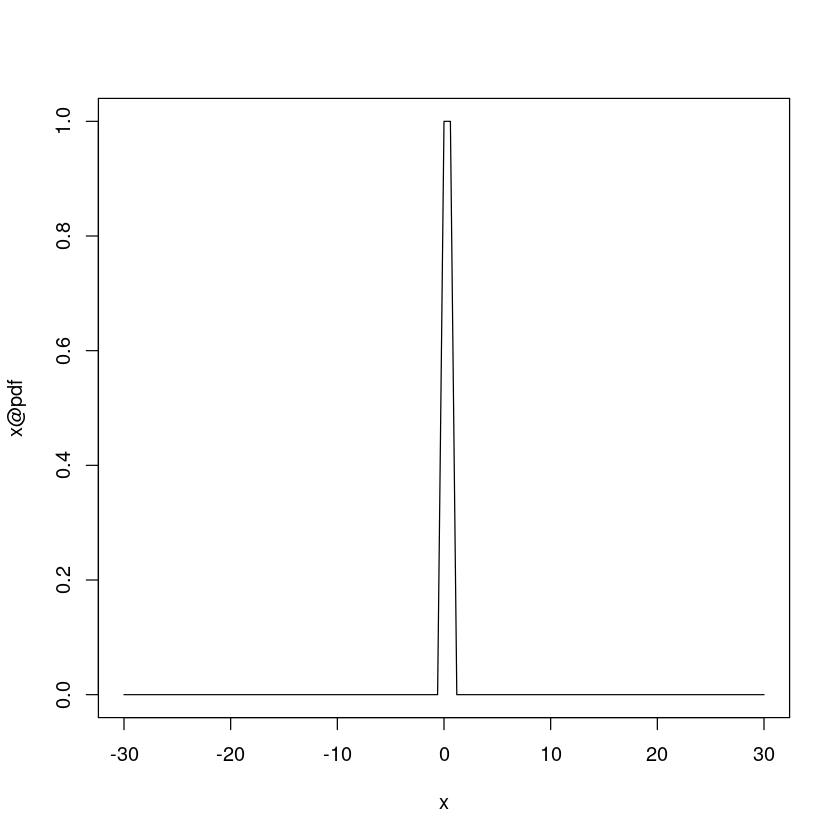

ERROR: Error in validObject(.Object): invalid class “CoreVariable” object: Density function doesn't add to 1!


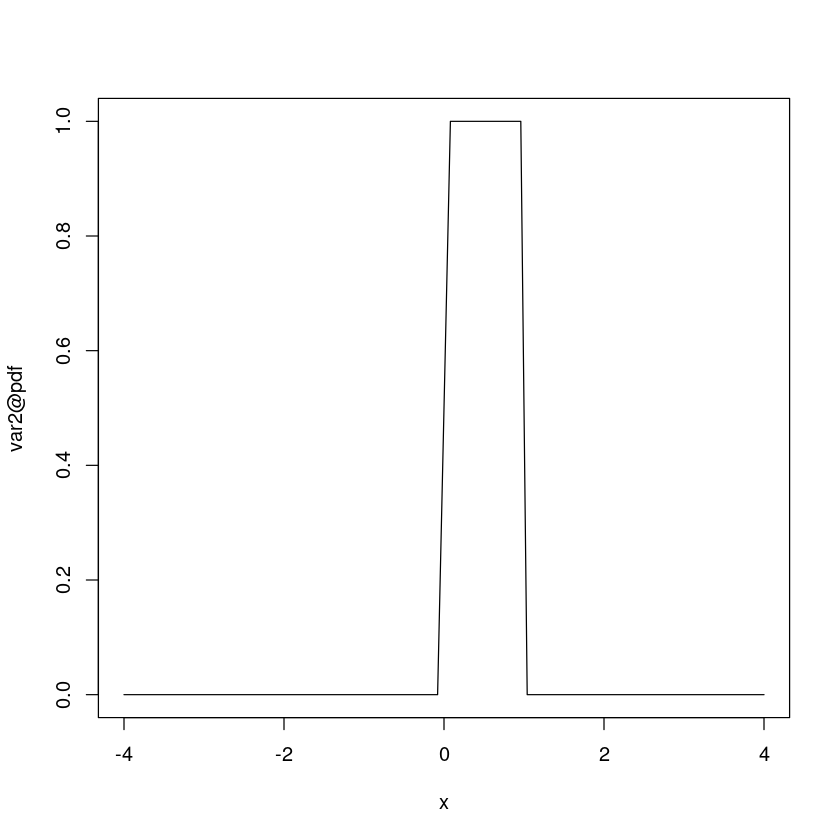

In [4]:
pdf <- function(x) {
  if (x >= 0 && x <= 1)
    return(1)
  return(0)
}

var <- BuildFromPDF(pdf)
plot(var)

cdf <- function(x) {
  if (x < 0)
    return(0)
  if (x > 1)
    return(1)
  return(x)
}

var2 <- BuildFromCDF(cdf)
plot(var2@pdf, -4, 4)

wrong_pdf <- function(x) {
  if (x < 0 || x > 1)
    return(0)
  return(2)
}

v3 <- BuildFromPDF(wrong_pdf)

## Exercise IV

For this exercise we simply overloaded the `plot` function, and made available a bunch of functions like:

* `BuildUniformDistribution(left, right)`
* `BuildNormalDistribution(mean, stddev)`
* `BuildExponentialDistribution(lambda)`

By constructing such an object, the user can easily plot it.

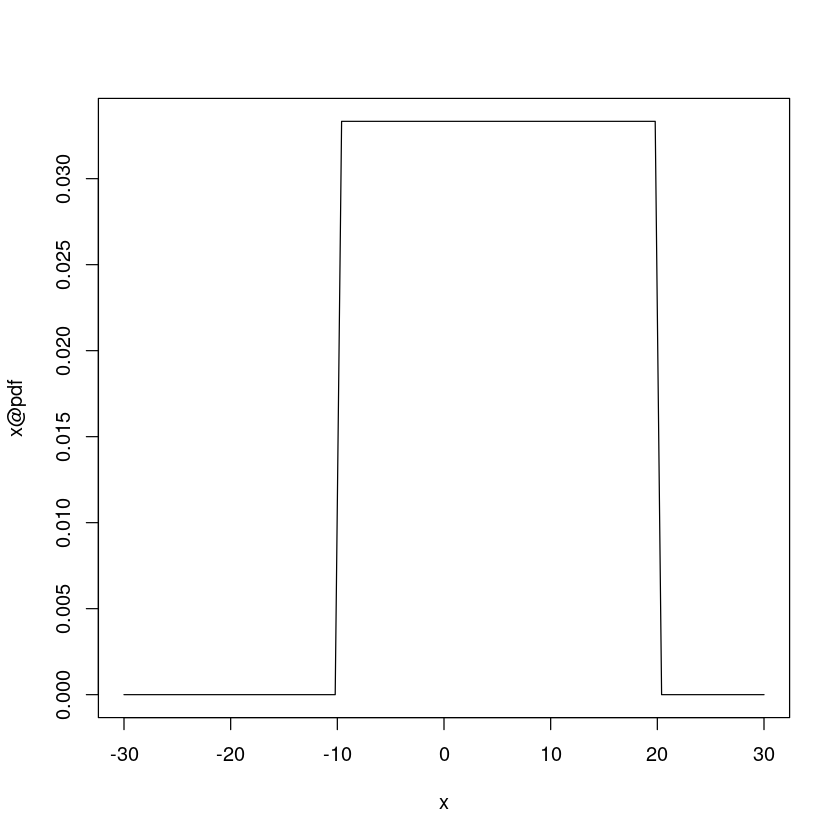

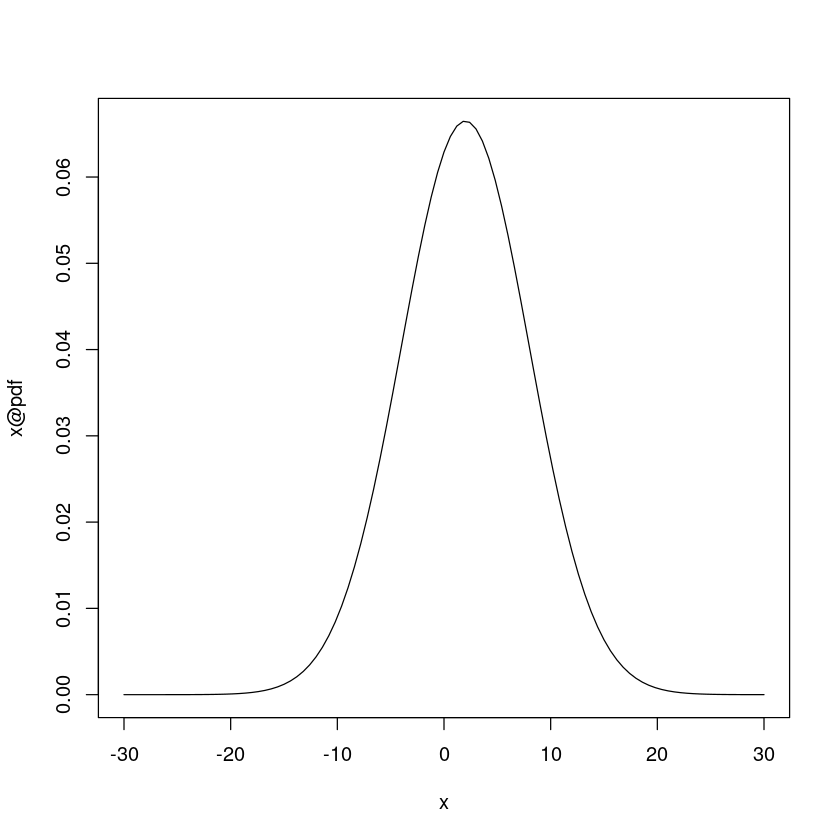

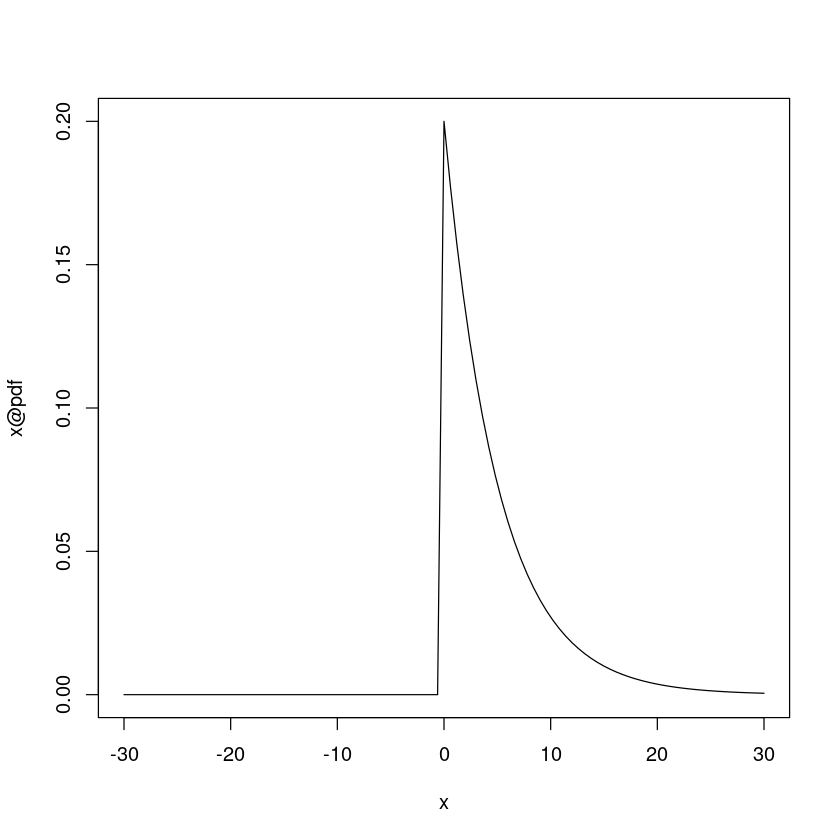

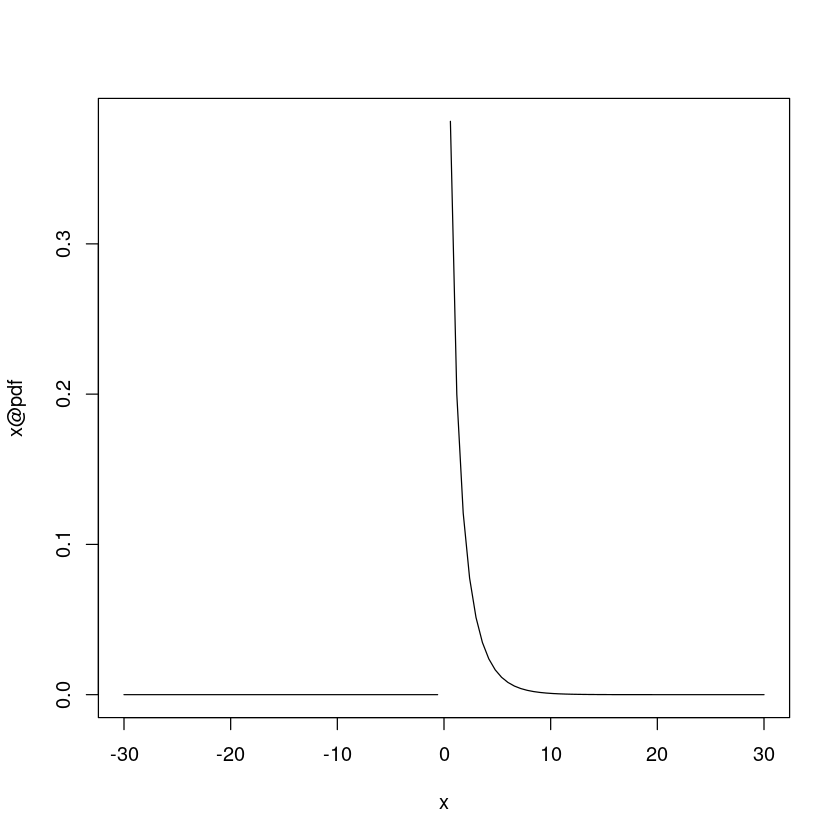

In [5]:
v1 <- BuildUniformDistribution(-10, 20)
plot(v1)

v2 <- BuildNormalDistribution(2, 6)
plot(v2)

v3 <- BuildExponentialDistribution(0.2)
plot(v3)

v4 <- BuildChiSquareDistribution(1)
plot(v4)

## Exercise V

For this exercise we made a few functions which compute the required values.

In [6]:
v1 <- BuildNormalDistribution(2, 1)

# Calculeaza media
print(Average(v1))

# Calculeaza dispersia
print(Variance(v1))

# Calculeaza momentul initial de ordin 7
print(RawMoment(v1, 7))

# Calculeaza momentul centrat de ordin 4
print(CentralMoment(v1, 4))

[1] 2
[1] 1
[1] 1850
[1] 3


## Exercise VI


In [7]:
v1 <- BuildNormalDistribution(1, 2)

transformation <- function(x) {
  return(2 * x - 4)
}

print(ComputeMeanForFunc(v1, transformation))
print(ComputeVarForFunc(v1, transformation))

[1] -2
[1] 16


## Exercise VII


In [8]:
v1 <- BuildUniformDistribution(-10, 10)

is_positive <- function(x) {
  return(x > 0)
}

is_smaller_2 <- function(x) {
  return(x < 2)
}

prob <- Conditional(v1, is_smaller_2, is_positive)
print(prob)

prob2 <- Conditional(v1, is_smaller_2)
print(prob2)

[1] 0.2
[1] 0.6


## Exercise VIII


In [12]:
Information("sdfds")

Distributia cautata nu este catalogata. Incercati una dintre urmatoarele:
        'Uniforma'
        'Normala'
        'Exponentiala'
        'Chi' squared
        'Pareto'


## Exercise IX


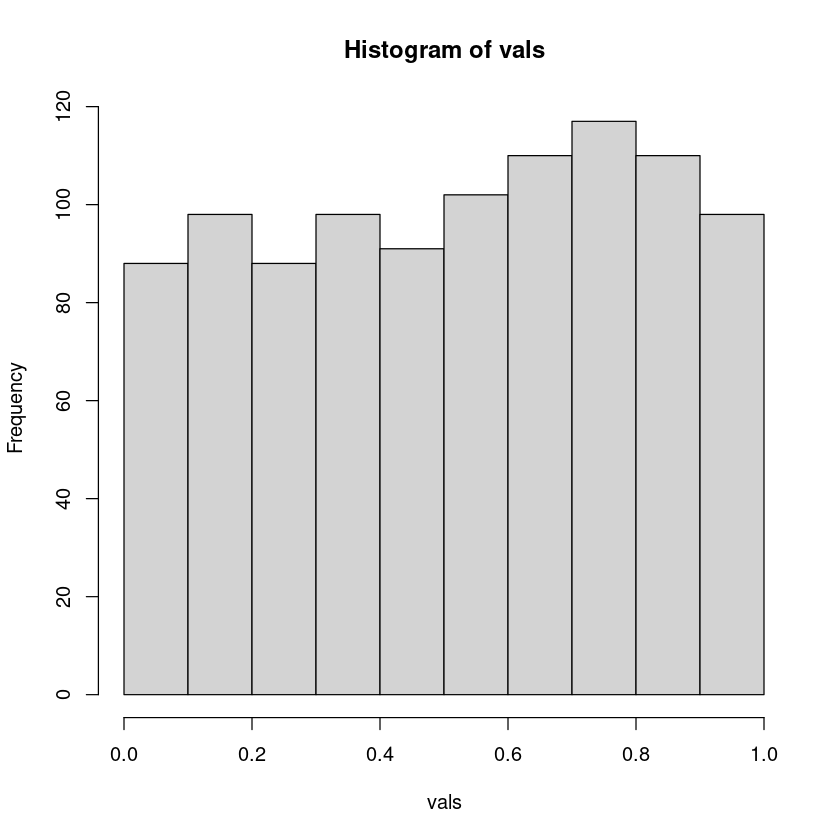

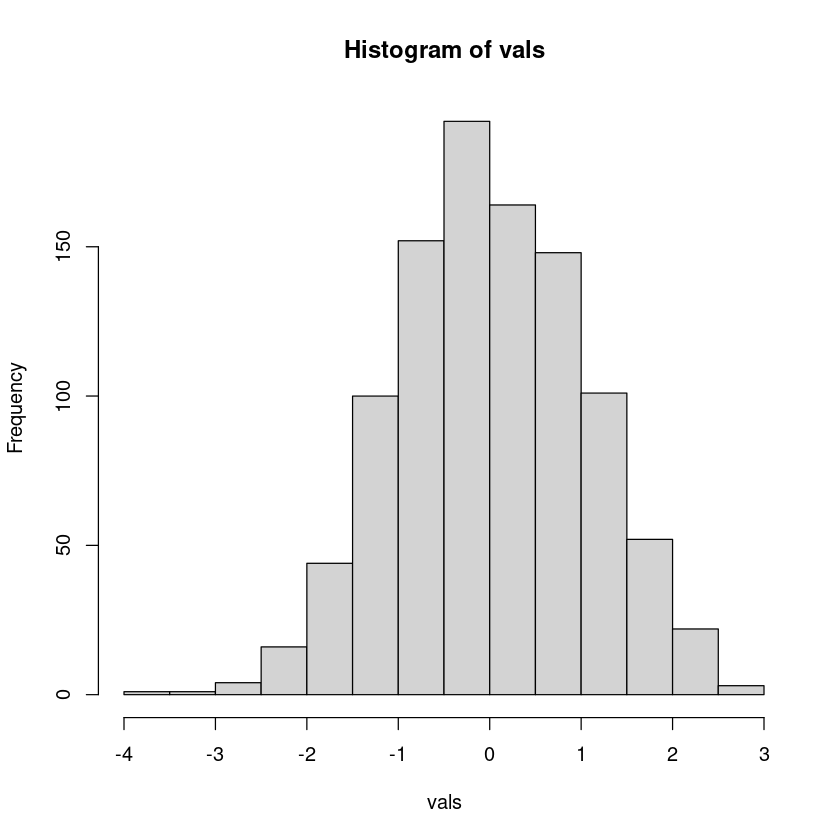

In [13]:
v1 <- BuildUniformDistribution(0, 1)
vals <- SamplePointsFromDistribution(v1, 1000)
hist(vals)

v2 <- BuildNormalDistribution(0, 1)
vals <- SamplePointsFromDistribution(v2, 1000)
hist(vals)

## Exercise X


In [14]:
common_pdf <- function(x, y) {
  if (min(x, y) < 0 || max(x, y) > 4)
    return(0)
  if (x + y > 6 || x + y < 2)
    return(0)
  return(1 / 12)
}

cov <- Covariance2d(common_pdf)
print(cov)

[1] -0.5557416


In [15]:
corel <- Corelation2d(common_pdf)
print(corel)

[1] -0.5002081


## Exercise XI


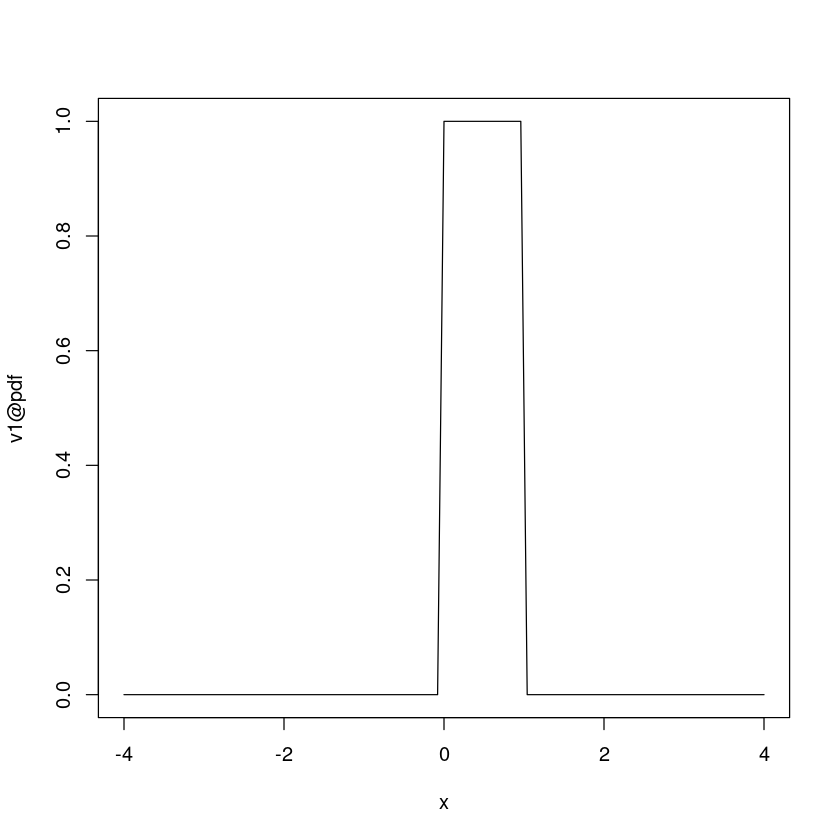

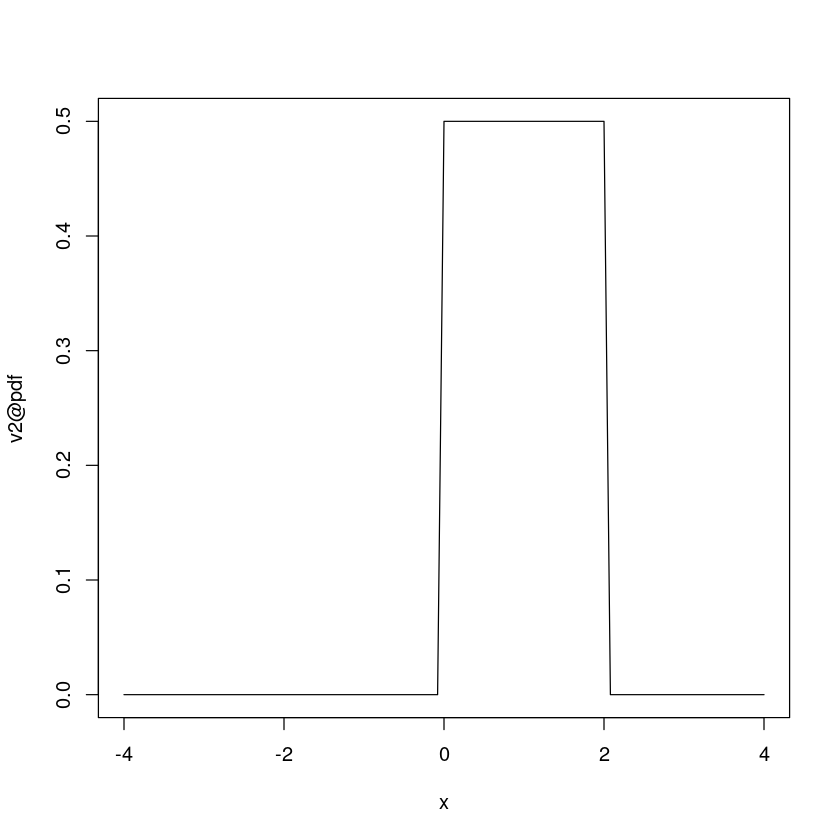

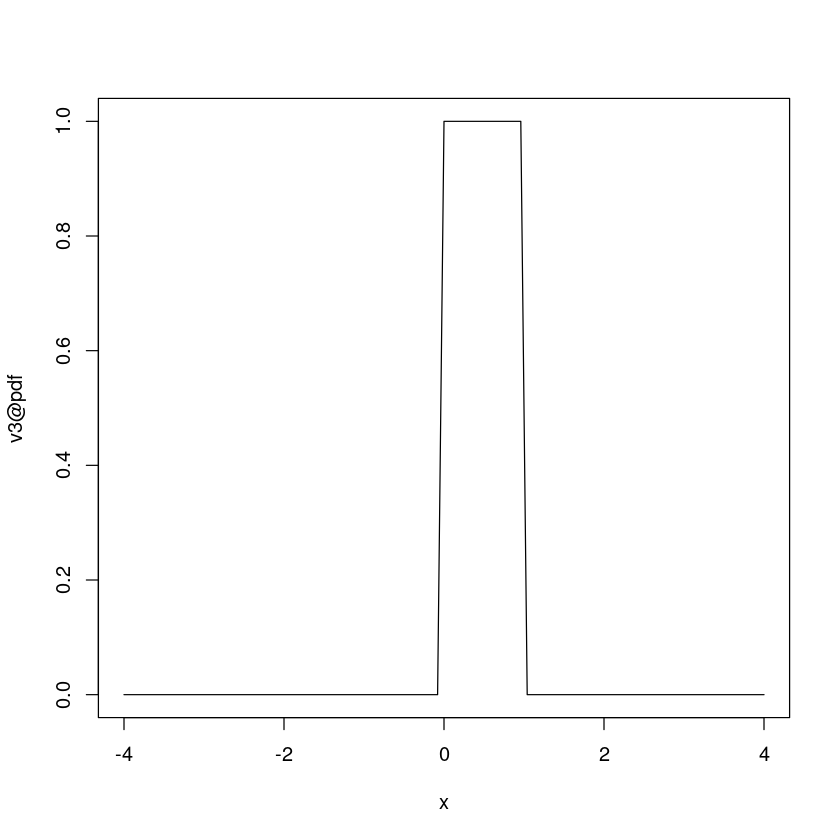

In [10]:
common_dist <- function(x, y) {
  if (x < 0 || y < 0 || x > 1 || y > 2)
    return(0)
  return(1/2)
}

v1 <- BuildFromCommonPDF(common_dist, ax=1)
plot(v1@pdf, -4, 4)
v2 <- BuildFromCommonPDF(common_dist, ax=2)
plot(v2@pdf, -4, 4)
v3 <- BuildConditionalPDF(common_dist, 2, 1)
plot(v3@pdf, -4, 4)

## Exercise XII

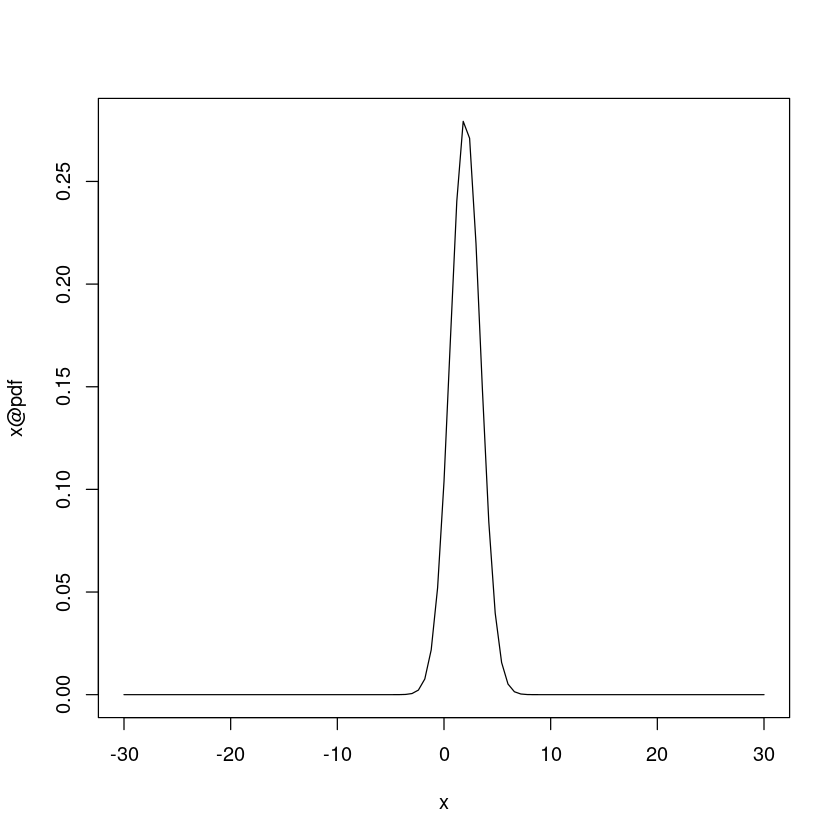

In [2]:
v1 <- BuildNormalDistribution(1, 1)
v2 <- BuildNormalDistribution(1, 1)

v3 <- v1 + v2
plot(v3)

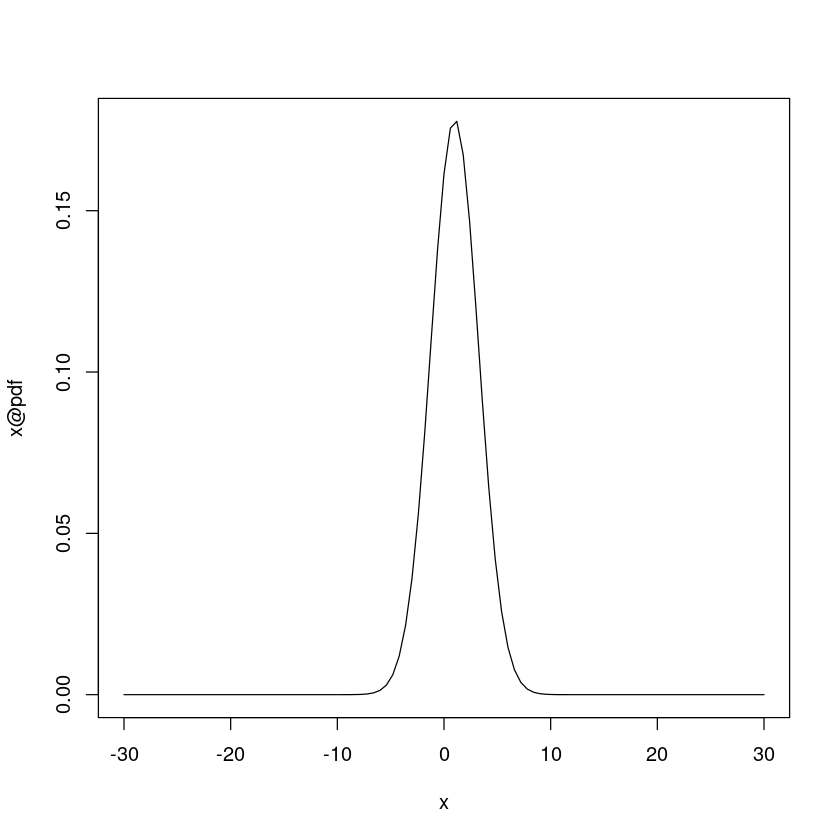

In [6]:
v4 <- 2 * v1 - v2
plot(v4)

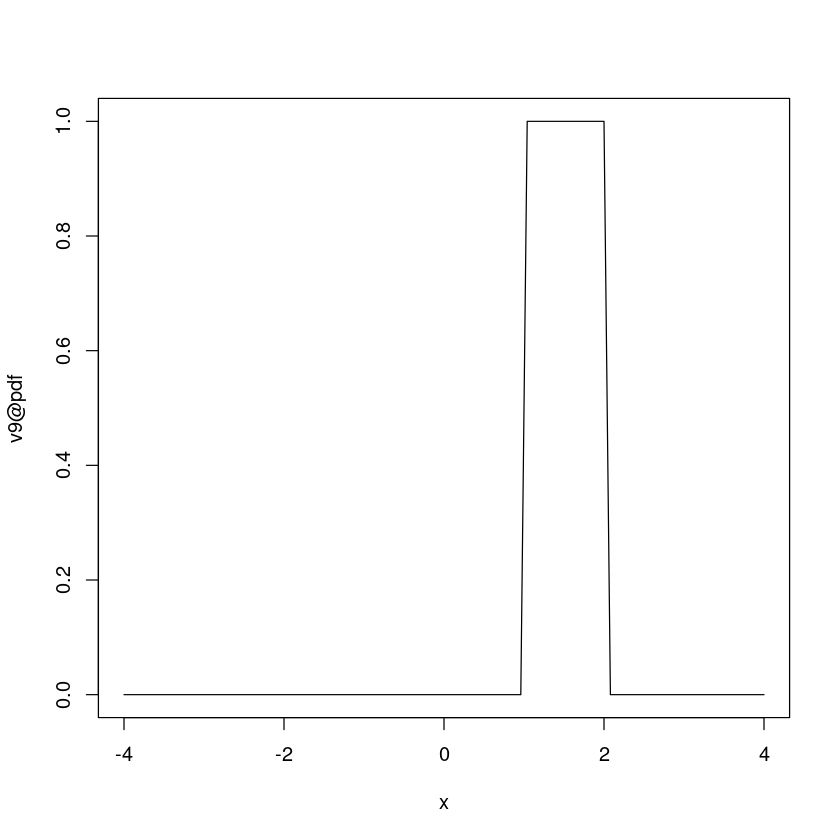

In [18]:
v8 <- BuildUniformDistribution(0, 1)
v9 <- v8 + 1

plot(v9@pdf, -4, 4)

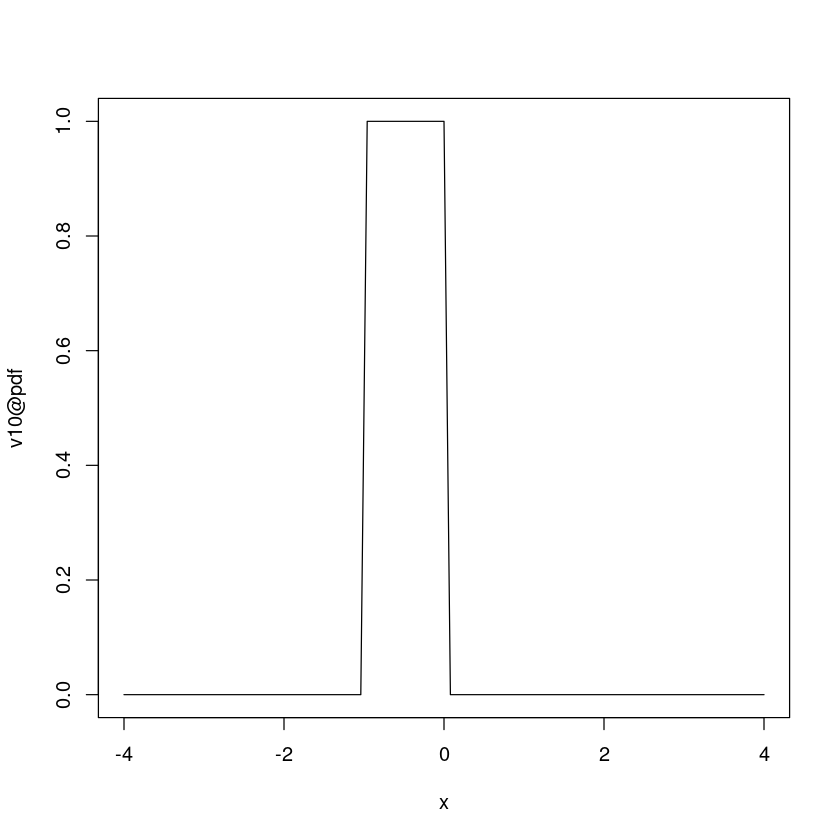

In [19]:
v10 <- -v8
plot(v10@pdf, -4, 4)

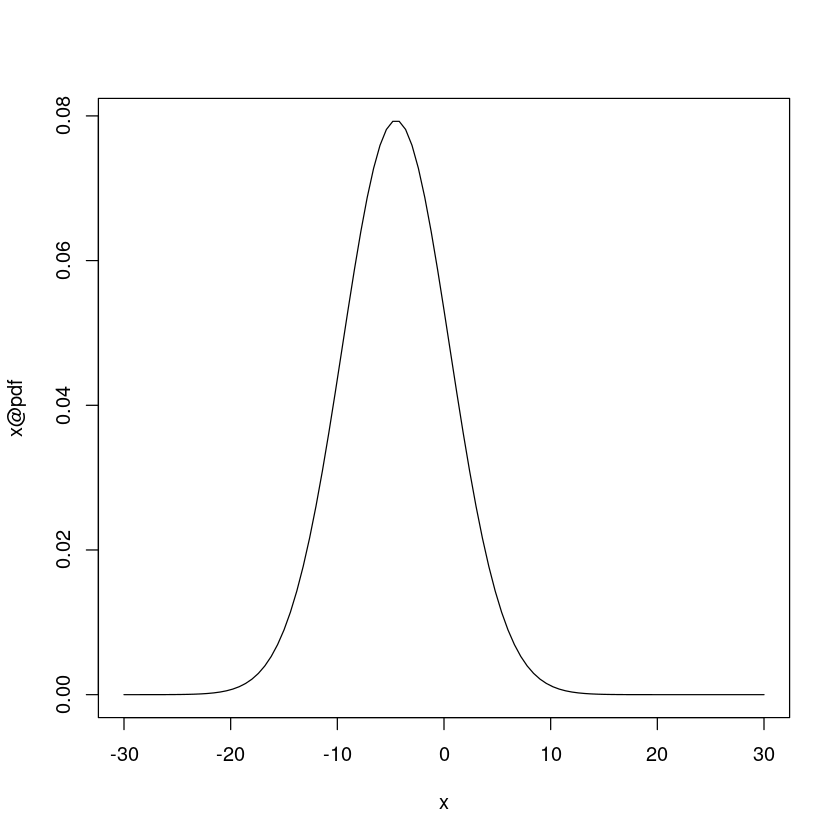

In [4]:
v11 <- -v1 * 5 + v2 / 2
plot(v11)